In [1]:
from wordcloud import WordCloud
from PIL import Image
from PIL import ImageOps  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
texts = [
    '10 землекопов',
    'Согласуйте в репозитории',
    'Заявочка в джире',
    'Ёбанный стыд',
    'ПИДОРАСЫ',
    'НАЯБЫВАЮТ',
    'ГДЕ ТЗ',
    'Согласовано',
    'Лотус лежит',
    'Бан',
    'Оно не сходится',
    'ГДЕ ПРОДАЖИ',
    'Что Вы делали целый час?!',
    'Либо беременна, либо нет',
    'Временное - это залог постоянного',
    'Там правки по КУАПу',
    'Бля',
    'Ты сбрасывался?',
    'Какие ваши доказательства?',
    'Я там письмо написал',
    'Все вопросы после обеда',
    'Когда на пиво идём?',
    'Просрочка по кешам в мае',
    'Там задача по PreCollection',
    'У IT нет ресурса',
    'ОК',
    'PR',
    'Согласуйте',
    'Заявочка в РЕПО',
    'Заявочка в JIRA',
    'DWH',
    'Нет доступа',
    'Дима, откуда эти цифры?',
    'Мне Яровой сказал',
    'Что там по Portmone?',
    'Где доходность?',
    'Где PnL?',
    'Когда SMS отправят?',
    'Где прозвон?',
    'Дрисня',
    'Ну а хули нам, удалёнщикам',
    'Это хуйня!',
    'Виноваты риски',
    'Виноваты IT',
    'У нас ЧП',
    'Отчётов нет',
    'Оно ещё обновляется',
    'Где отчёты',
    'Ищите в анале',
    'Тексты на согласовании',
    'Го курить',
    'Люди делятся на два типа',
    'Ку',
    'Прив',
    'Пинг',
    'Банк Александра Белого',
    'Никополь',
    'Там что-то сломалось',
    'Это всё попередныкы',
    'Что заказываем?',
    'Дима Борисов пидорас',
    'Кто-то мак будет?',
    'Половина Банка раком стоит',
    'Отчёт непонятный',
    'А можно по-человечески объяснить?',
    'Что 300? А что приборы?',
    'Дедлайн вчера',
    'Я завтра на удалёнке',
    'Ты домашку сделал?',
    'Давайте по-нормальному',
    'Давайте кондиционер включим',
    'Мне холодно',
    'Ебала жаба гадюку',
    'Нет ТЗ - результат ХЗ',
    'Шо у тебя в работе?',
    'Шо у тебя по задачам?',
    'Пойдём выйдем',
    'Ты с какой целью интересуешься?',
    'Кофе с молоком',
    'Вика, ещё не 5',
    'Заводим жигуль',
    'Всем привет',
    'Ну ты там сВПРь',
    'Правки УДБО',
    'Комитет будет?',
    'Надо согласовать с Чудаковским',
    'Ура, юристы согласовали',
    'Ща',
    'Сек',
    'Сейчас пописяю',
    '2 минуты',
    'Давай твои покурим',
    'Согласуй с Катей',
    'Согласуй с Богданом',
    'Нужно перезакрепить задачи',
    'СРОЧНО',
    'Файлики для Пети',
    'CV',
    'Я пидорас',
    '',
    '',
]

In [3]:
texts = [t for t in texts if t!='']

In [4]:
img = Image.open(r'C:\Users\saloe\Desktop\бкд.png')

r, g, b, a = img.split()
rgb_image = Image.merge('RGB', (r, g, b))

r, g, b = ImageOps.invert(rgb_image).split()
img_inv = Image.merge('RGBA', (r, g, b, a))

mask = np.array(img_inv)

#mask = np.array(img)


In [5]:
state = 228
rs = np.random.RandomState(state)

In [6]:
wc = WordCloud(max_words=1000, margin=10, mask=mask, random_state=state)


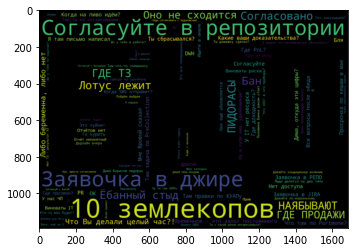

In [7]:
freq_map = {t: 1 for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('00_same_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))

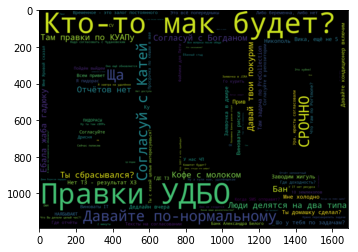

In [8]:
freq_map = {t: rs.random() for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('01_random_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))

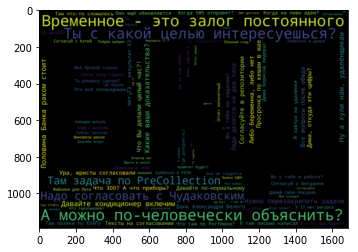

In [9]:
freq_map = {t: len(t) for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('02_proportional_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))

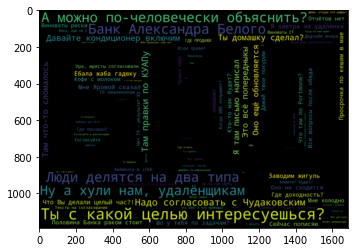

In [10]:
freq_map = {t: len(t)*rs.random() for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('03_proportional_random_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))

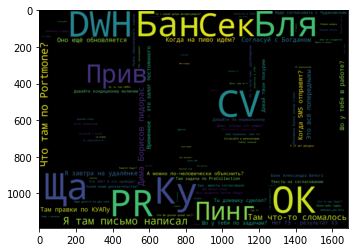

In [11]:
def my_freq_conversion(freq):
    coefs = [0.75, 12.32, -159.14, 626.99, -935.14, 81.63, 1254.24, -1280.36, 399.52]
    res = 0
    for power, coef in enumerate(coefs):
        res += coef * pow(freq, power)
    return min(res,1)

max_len = max(map(len, texts))
freq_map = {t: my_freq_conversion(len(t) / max_len) for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation='bilinear')

with open('04_inv_proportional_regression_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))


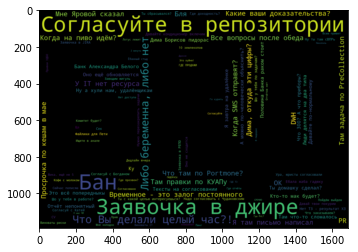

In [12]:
def bias_freq(freq, bias):
    if bias < 0 or bias > 1:
        raise ValueError(f'Wrong bias value: {bias}')
    bias = bias + 1
    return min(1.5 + (pow(bias / (1 + freq), 12) - 2 * pow(bias / (1 + freq), 6)), 1)

max_len = max(map(len, texts))
freq_map = {t: bias_freq(len(t) / max_len, 0.2) for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation='bilinear')

with open('05_inv_proportional_biased_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))


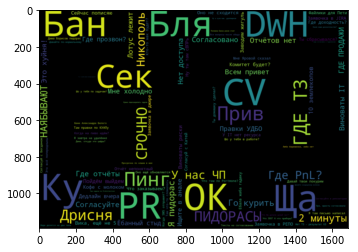

In [13]:
freq_map = {t: max(map(len, texts)) - len(t) for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('06_inv_proportional_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))


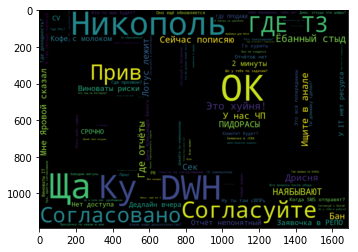

In [14]:
freq_map = {t: (max(map(len, texts)) - len(t)) * rs.random() for t in texts}
wordcloud = wc.generate_from_frequencies(freq_map).recolor(random_state=state)

plt.imshow(wordcloud, interpolation="bilinear")

with open('07_inv_proportional_random_freq.svg', 'wb') as f:
    f.write(wordcloud.to_svg().encode('utf8'))
